In [1]:
import pandas as pd
import requests
import math
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan
from pandas.io.json import json_normalize

# Approach for getting data for Bigger Lists API calls

## Situation

The website cuurently allows 100 get request per minute and we are trying to make calls through for loops calling data for each element of the list in the loop.
The problem arises wherever we have lists going over 100.

## Proposed solution
Make calls in batches (chunks) of 100 elements list and run schedulers to make those calls in every 60 seconds
This way we are able to make calls in 60seconds interval batches.
For detailed explanation of step by step process skip to step 8) first where we are extracting bus stops' features data.

## 0) Creating Objects Useful for Further Operations

In [2]:
# Creating a function which will take list as input
# The function with create sub-lists of 100 elements in the whole list
# Since the API requests per minute are capped at 100 we want to iterate with lists of 100 elements per minute

def divide_chunks(input_list):
    
    # Loops starts with 0 till number of stops and hops on to every another 100th element of the list
    
    for i in range(0, len(input_list), 100):
        
        # Indexes from 100 till another 100th element
        # For example indexing at first loop i=0 is [0:100]
        # For second loop the i=100 and indexing is [100:200]
        yield input_list[i:i + 100]

In [102]:
# Getting data on the routes of the buses in Winnipeg Transit

def get_routes():

    # Initializing routes data frame which will be populated by below for loop on each api call for every route
    df_routes = pd.DataFrame()

    # Running a for loop to fetch route information of each bus variant
    # We are putting value of route beginning number in the api url to fetch every possible bus variant information
    for route in range(0,10):
        response = requests.get(f"https://api.winnipegtransit.com/v3/routes:{route}.json?api-key=ApiKey")
        response_json = response.json()['routes']

        # using json_normalize package to flatten the json type data fetched from the api url
        # A temporary data frame df_each_route will contain information about each route 
        df_each_route = pd.json_normalize(response_json)

        # Populating the main dataframe df_routes will each route information through concatenation
        df_routes = pd.concat([df_routes, df_each_route], ignore_index=True)
    
    return df_routes

In [107]:
# Getting data of variants for each each bus route of Winnipeg Transit

def get_variants():   
    
    # Initializing our new dataframe which will be concatenated with bus variants values in through our loop
    df_variant_main = pd.DataFrame(columns=['key', 'name'])


    for route in routes_list:
        # For each bus variant number we are fetching jso format data 
        response = requests.get(f"https://api.winnipegtransit.com/v3/variants:{route}.json?api-key=ApiKey")
        # capturing only variants information
        variants_list = response.json()['variants']

        # creating a temporary dataframe which will contain contain each bus variant information 
        # this temporary df will be used to concatenate our main dataframe df_variant_main
        df_each_variant = pd.DataFrame(variants_list)
        df_each_variant['Route'] = route

        # Creating main dataframe where all bus varaints will go to
        # Ignoring index to have sequential indexes as per the populated data in the file 
        df_variant_main = pd.concat([df_variant_main, df_each_variant], ignore_index=True)
        
    return df_variant_main
    

## Exploring Data Based on Different Parameters

### 1) Routes

In [104]:
df_routes = get_routes()
df_routes

,key,number,name,customer-type,coverage,badge-label,variants,badge-style.class-names.class-name,badge-style.background-color,badge-style.border-color,badge-style.color
0,11,11,Route 11 Portage-Kildonan,regular,regular,11,"[{'key': '11-0-*'}, {'key': '11-1-R'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
1,15,15,Route 15 Sargent-Mountain,regular,regular,15,"[{'key': '15-0-F'}, {'key': '15-0-L'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
2,16,16,Route 16 Selkirk-Osborne,regular,regular,16,"[{'key': '16-0-B'}, {'key': '16-0-M'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
3,17,17,Route 17 McGregor,regular,regular,17,"[{'key': '17-1-MH'}, {'key': '17-0-A'}, {'key'...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
4,12,12,Route 12 William,regular,regular,12,"[{'key': '12-1-C'}, {'key': '12-0-P'}]","[badge-label, regular]",#ffffff,#d9d9d9,#000000
...,...,...,...,...,...,...,...,...,...,...,...
79,90,90,Route 90 Kildonan Place - Whellams Lane,regular,regular,90,"[{'key': '90-1-k'}, {'key': '90-0-K'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
80,93,93,Route 93 South St. Vital - St. Marys,regular,regular,93,"[{'key': '93-1-S'}, {'key': '93-0-H'}]","[badge-label, regular]",#ffffff,#d9d9d9,#000000
81,96,96,Route 96 St. Vital Centre - Windsor Park,regular,regular,96,"[{'key': '96-1-S'}, {'key': '96-0-P'}]","[badge-label, regular]",#ffffff,#d9d9d9,#000000
82,92,92,Route 92 Crossroads Station - Lakeside Meadows,regular,regular,92,"[{'key': '92-1-C'}, {'key': '92-0-L'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000


In [4]:
df_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   key                                 83 non-null     int64 
 1   number                              83 non-null     int64 
 2   name                                83 non-null     object
 3   customer-type                       83 non-null     object
 4   coverage                            83 non-null     object
 5   badge-label                         83 non-null     int64 
 6   variants                            83 non-null     object
 7   badge-style.class-names.class-name  83 non-null     object
 8   badge-style.background-color        83 non-null     object
 9   badge-style.border-color            83 non-null     object
 10  badge-style.color                   83 non-null     object
dtypes: int64(3), object(8)
memory usage: 7.3+ KB


<AxesSubplot:xlabel='number', ylabel='Count'>

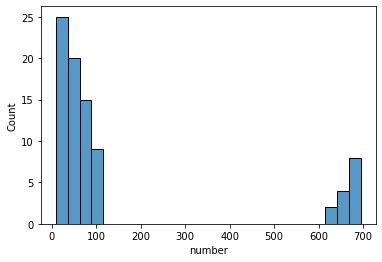

In [5]:
# Checking bus number distribution through a histogram
# Making sure all the bus routes are covered

sns.histplot(x=df_routes['number'])

In [6]:
# Creating a list of routes

routes_list = list(df_routes['number'])
len(routes_list)

83

In [105]:
# Exporting the dataframe to csv

df_routes.to_csv('Routes.csv', index=False)


### 2) Variants of Buses Running in Winnipeg

Background:

There are many bus variants running on Winnipeg's roads. The bus variants are extension to bus route number. For Eg: Route 11 Bus can have variants such as 11-1-M (Portage-Kildonan to City Hall)

Approach For Data Extraction:

We will use wildcard api search for every route number of the bus and find corresponding variants for that

In [112]:
df_variants = get_variants()
df_variants

,key,name,Route,description
0,11-0-P,Portage-Kildonan to Polo Park,11.0,NaN
1,11-1-G,Portage-Kildonan to Glenway via,11.0,NaN
2,11-1-R,Portage-Kildonan to North Kildonan via Rothesay,11.0,NaN
3,11-0-*,Portage-Kildonan to Henderson,11.0,NaN
4,11-1-D,Portage-Kildonan to North Kildonan via Donwood,11.0,NaN
...,...,...,...,...
280,97-1-P,to Point Douglas,97.0,NaN
281,97-0-F,to Fife,97.0,NaN
282,97-1-f,to Fife,97.0,NaN
283,93-1-S,to St. Vital Centre,93.0,NaN


In [113]:
# Checking the number of unique bus variants running on Winnipeg's roads

df_variant_main.key.nunique()

271

In [114]:
df_variant_main.to_csv('bus_variants.csv')

# 3) Destinations
## Important Landmarks Stops for every bus variant

Background:

For each bus variant, there are some destinations  which are important landmarks which buses on the variant will pass through. We are trying to capture this data

Approach for Data Extraction:
The API allows information to be fetched for each single bus variant. Hence, to get our Destinations, we are running a for loop on the list of bus variants we extracted from above.


In [115]:
# Creating a list of all unique bus variants name which we will use in our for loop to extract destinations of all these variants

bus_variants_list = list(set(df_variant_main['key']))
busvariants_count = len(bus_variants_list)
print(bus_variants_list[:10])
print(f'Number of bus variants are: {busvariants_count}')

['45-0-K', '29-0-L', '98-1-G', '16-0-s', '12-0-P', '85-1-W', '16-1-P', '10-1-WT', '66-1-D', '11-1-D']
Number of bus variants are: 271


In [116]:
# Creating a function which will take bus variants list as input
# The function with create sub-lists of 100 elements in the variants list of 271 elements

def divide_chunks(bus_variants_list):
    
    # Loops starts with 0 till number of stops and hops on to every another 100th element of the list
    
    for i in range(0, busvariants_count, 100):
        
        # Indexes from 100 till another 100th element
        # For example indexing at first loop i=0 is [0:100]
        # For second loop the i=100 and indexing is [100:200]
        yield bus_variants_list[i : i+100]

In [118]:
# Calling the function and giving it object name bus_variants_chunks
# bus_variants_chunks in coverted list of chunks of list with 100 elements each

chunks_required = math.ceil(busvariants_count/100)
bus_variants_chunks = list(divide_chunks(bus_variants_list))
print(f'Number of bus_stops chunks from original bus stops list: {len(bus_variants_chunks)}')

# Printing count of elements in each chunk index of the new 
for i in range(len(bus_variants_chunks)):
    print(f'Number of elements in chunk index {i}: {len(bus_variants_chunks[i])}')

Number of bus_stops chunks from original bus stops list: 3
Number of elements in chunk index 0: 100
Number of elements in chunk index 1: 100
Number of elements in chunk index 2: 71


In [119]:
# Sample view of how newly created list of bus variants chunks looks like
# We are viewing sample of 10 results for the bus variants chunks list at index 0

bus_variants_chunks[0][:10]

['45-0-K',
 '29-0-L',
 '98-1-G',
 '16-0-s',
 '12-0-P',
 '85-1-W',
 '16-1-P',
 '10-1-WT',
 '66-1-D',
 '11-1-D']

In [120]:
# Creating a function which will go inside in each bus_variants_chunks list elements
# And make an api call for each bus variant chunkwise


# Initializing with an empty pandas dataframe which will populate with each api call.
# Every time this function is called for further chunk indexes it will empty values of previous run
df_destinations_per_chunk = pd.DataFrame()

# This function takes in chunk_index(what chunk of the whole list to work on)
# Then for each chunk index makes api calls of bus variants in that chunk

def bus_variants_chunkwise(chunk_index):
    
    global df_destinations_per_chunk
    
    
    # Running a for loop to make api call for each stop in the bus_stops_chunks list
    for variant in bus_variants_chunks[chunk_index]:
        try:

            response = requests.get(f"https://api.winnipegtransit.com/v3/variants/{variant}/destinations.json?api-key=ApiKey")
            json_format = response.json()['destinations']

            # If the search returns no errors or any empty value
            if json_format != []:

                # Recording the information got into a temporary frame df_each_stop_destinations
                df_each_stop_destinations = pd.json_normalize(json_format)
                df_each_stop_destinations['Bus_Variant'] = variant

            # If the api search returns a blank search, the variant will be recorded in the dataframe with empty values
            else:
                df_each_stop_destinations.loc[len(df_each_stop_destinations.index)] = [None, None, f'{variant}']

        # If the api search returns any error, the variant will be recorded in the dataframe with empty values
        except:
            print(f'{variant} returned error in search. No values found for this variant')
            df_each_stop_destinations.loc[len(df_each_stop_destinations.index)] = [None, None, f'{variant}']


        # Simulatenous concatanetion of each stop's info in df_stop_feature_chunk
        df_destinations_per_chunk = pd.concat([df_destinations_per_chunk, df_each_stop_destinations], ignore_index=True)

In [121]:
# Initializng with index 0

chunk_index=0

# Initializing empty dataframe which will contain bus destinations of all bus variants
# This is our final outcome 

df_bus_destinations = pd.DataFrame()

# Creating a function to repeadtly execute above created function bus_stop_features_chunkwise
# On every run chunk_index increases by 1 
# We will repeadtly make calls of this function in 60 secods intervals

# This function merely runs the previous function and takes in index number of chunk list
def bus_destinations(index):
    
    # Declaring chunk_index and chunks_required variable as global as its referenced before the function
    global chunk_index
    global chunks_required
    global df_bus_destinations
    global df_destinations_per_chunk
    
    # The loop will run until the index_count reaches equal to chunks_required
    # which is number of bus stops in our list divided by 100 elements' chunks)
    if chunk_index <= chunks_required:
        
        
        bus_variants_chunkwise(chunk_index=chunk_index)

        # For each loop, index value be incremented by 1 which becomes input when function is run again
        chunk_index+=1

        # Concatenating with main dataframe
        df_bus_destinations = pd.concat([df_bus_destinations, df_destinations_per_chunk], ignore_index=True)
            
        print(f'Chunk index {chunk_index-1} of Bus Destinations List Added to Dataframe at {time.ctime()}')
        print(f'Number of Variants added: {df_destinations_per_chunk.Bus_Variant.nunique()}')
        print(f'Number of rows of dataframe after addition: {len(df_bus_destinations)}' )
        
        # Emptying the last chunk's dataframe on everyloop to avoid data duplication
        df_destinations_per_chunk = pd.DataFrame()
    else:
        print('Every Bus Destination put into the dataframe. Process complete')
        

In [122]:
# Importing schedule library for scheduling tasks

import schedule
import time

# Creating a schedule object which will run the bus_stops_features function at every 60 seconds intreval
# We also have defined the index to start with, i.e 0 which will initialized above
schedule.clear()
schedule.every(60).seconds.do(bus_destinations, index=chunk_index)

# Checking pending jobs

schedule.get_jobs()

[Every 60 seconds do bus_destinations(index=0) (last run: [never], next run: 2022-12-11 10:50:29)]

In [123]:
# Running a while loop which will keep the scheduled job running at 1 minute intervals
# The scheduled job will run until the all chunks in the bus variants list are looped and entered into dataframe


# The loop will run until chunk_index(which is incrementing by 1 on every loop) reaches the equal to (number of chunks + 1)
# We have 3 chunks_required (sub-lists of 100 bus variants) in our whole 271 bus_variants_list
# The while loop stops when chunk_index rises to value greater than required chunks

while chunk_index <= chunks_required:
    
    # If statement runs until all chunk indexes are looped, which in our case is 41
    if chunk_index <= (chunks_required-1):
        schedule.run_pending()
    
    # Once the index reaches 2 and increments to 3, it means we have looped all the chunks 
    # Scheduler stops there
    else:
        # Clearing pending schedules after job is done
        schedule.clear()
        print('Scheduler Stopped. Process Complete ')
        break
        

16-1-## returned error in search. No values found for this variant
10-1-# returned error in search. No values found for this variant
47-1-# returned error in search. No values found for this variant
14-1-## returned error in search. No values found for this variant
11-1-## returned error in search. No values found for this variant
68-1-# returned error in search. No values found for this variant
15-1-# returned error in search. No values found for this variant
19-0-# returned error in search. No values found for this variant
Chunk index 0 of Bus Destinations List Added to Dataframe at Sun Dec 11 10:51:06 2022
Number of Variants added: 100
Number of rows of dataframe after addition: 404
71-0-S# returned error in search. No values found for this variant
20-1-# returned error in search. No values found for this variant
55-1-## returned error in search. No values found for this variant
Chunk index 1 of Bus Destinations List Added to Dataframe at Sun Dec 11 10:52:36 2022
Number of Variants 

In [124]:
df_bus_destinations

,key,name,Bus_Variant
0,10,City Hall,45-0-K
1,156,Point Douglas,45-0-K
2,55,Kildonan Place,45-0-K
3,104,Munroe,45-0-K
4,248,Crossroads Station,45-0-K
...,...,...,...
1032,5,Downtown,23-1-C
1033,10,City Hall,11-1-M
1034,36,Polo Park,11-1-M
1035,9,Polo Park,11-1-M


In [125]:
df_bus_destinations.to_csv('Bus_Destinations.csv')

# 4) Locations
## Getting locations of buses

In [72]:
# Checking search results for 'downtown' query

response = requests.get("https://api.winnipegtransit.com/v3/locations:downtown.json?api-key=ApiKey")
a = response.json()['locations']
# Here we are creating a seperate dataframe to keep a check on the query time also
df_locations = pd.DataFrame.from_records(a)
df_locations


,key,name,categories,address,type
0,10966,Downtown Biz,[Entertainment: Tourist Attractions],"{'key': 137345, 'street-number': 426, 'street'...",monument
1,4408,Quest Inn Downtown,[Entertainment: Hotels/Motels],"{'key': 147099, 'street-number': 367, 'street'...",monument
2,11248,ACCESS Downtown,"[Government: Manitoba, Clinics: Medical]","{'key': 218029, 'street-number': 640, 'street'...",monument
3,2231,Smoke's Poutinerie - Downtown,[Entertainment: Restaurants],"{'key': 142798, 'street-number': 131, 'street'...",monument
4,5032,The Bay - Downtown,[Shops: Major Stores],"{'key': 137347, 'street-number': 450, 'street'...",monument


In [73]:
a = response.json()['locations'][0]
a

{'key': 10966,
 'name': 'Downtown Biz',
 'categories': ['Entertainment: Tourist Attractions'],
 'address': {'key': 137345,
  'street-number': 426,
  'street': {'key': 2903, 'name': 'Portage Avenue', 'type': 'Avenue'},
  'centre': {'utm': {'zone': '14U', 'x': 632958, 'y': 5528183},
   'geographic': {'latitude': '49.89126', 'longitude': '-97.1489'}}},
 'type': 'monument'}

In [74]:
# Importing json_normalize package which will make transformation of json object to pandas dataframe easier

from pandas.io.json import json_normalize
json_normalize(a)

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_17724/3543066072.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(a)


,key,name,categories,type,address.key,address.street-number,address.street.key,address.street.name,address.street.type,address.centre.utm.zone,address.centre.utm.x,address.centre.utm.y,address.centre.geographic.latitude,address.centre.geographic.longitude
0,10966,Downtown Biz,[Entertainment: Tourist Attractions],monument,137345,426,2903,Portage Avenue,Avenue,14U,632958,5528183,49.89126,-97.1489


## Observation

Location data is based on user search for an address or landmark and the api locations will give the gps coordintes of the searched location. We right now don't find this dataframe much useful as the results are based on our location searches and locations are unlimited.
Keeping this for further use.

# 5) Service Advisories

## Contains advisories issued by Winnipeg Transit current and prior for this year

In [75]:
# Calling service advisories data from the api

response = requests.get("https://api.winnipegtransit.com/v3/service-advisories.json?api-key=ApiKey")
a = response.json()['service-advisories']
df_service_advisories = json_normalize(a)
df_service_advisories

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_17724/35264724.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_service_advisories = json_normalize(a)


,key,priority,title,body,category,updated-at,type
0,5263,3,(NOV 23/22) Valour Rd,"As of Nov 23, 2022 11:45, route 12 is under th...",Transit,2022-11-23T11:43:06,service-advisory
1,5197,3,"(SEP 12/22) 649, 691 Chevrier Detour","As of Sep 12, 2022 11:30, route 649 is under t...",Transit,2022-09-12T12:35:37,service-advisory
2,5007,3,(DEC 27/21) 635 Wolseley detour,"As of Apr 17, 2022 03:00, route 635 is under t...",Transit,2022-04-11T14:53:40,service-advisory


#### Note: Priority column shows service advisories of this priority or higher (where 1 is high, and 5 is low)

In [76]:
# Checking one sample body text of the first advisory in the data 

df_service_advisories['body'][0]

'As of Nov 23, 2022 11:45, route 12 is under the effects of a detour. This detour affects the following stops:\n\n* 10242 - Southbound Valour at Felix\n* 10243 - Northbound Valour at St. Matthews\n* 10244 - Southbound Valour at St. Matthews\n* 10245 - Southbound Valour at Dyson\n* 10791 - Northbound Valour at Dyson\n\nReroutes are as follows:\n\n* **Route 12 (William to City Hall)** from Valour Road will reroute following these instructions:\n** Travel along Valour Road and turn east on to Felix Avenue\n** Continue along Felix Avenue and turn north on to Spruce Street\n** Continue along Spruce Street and turn west on to Dyson Avenue\n** Continue along Dyson Avenue and turn north on to Valour Road\n** Return to regular service\n* **Route 12 (William to Polo Park)** from Valour Road will reroute following these instructions:\n** Travel along Valour Road and turn east on to Dyson Avenue\n** Continue along Dyson Avenue and turn south on to Spruce Street\n** Continue along Spruce Street and

# 6) Status

## Shows current status under which transit is operating

In [77]:
# Extracting status data from the api

response = requests.get("https://api.winnipegtransit.com/v3/statuses.json?api-key=ApiKey")
a = response.json()['statuses']
df_status = json_normalize(a)
df_status

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_17724/2839442592.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_status = json_normalize(a)


,name,value,description,updated-at,message
0,omnibus,normal,The current status of the Omnibus Web Services.,2022-11-24T10:07:42,NaN
1,schedule,regular,NaN,NaN,Winnipeg Transit is currently operating regula...


# 7) Stops

## Bus stops information

Background on Data: For each bus variant, information about each stop that it services is available. We can obtain various attributes of each bus stop against each bus variant through this.

Metholodology for Data Extraction: For every bus variant out of 206 variants we will make an api request and populate our dataframe. We will do this in chunks of 100 variants per minute to avoid server overload.

In [126]:
# Creating a function which will go inside in each bus_variants_chunks list elements
# And make an api call for each bus variant chunkwise

# Initializing with an empty pandas dataframe which will populate with each api call
df_stops_per_chunk = pd.DataFrame()


# This function takes in chunk_index(what chunk of the whole list to work on)
# Then for each chunk index makes api calls of bus variants in that chunk

def bus_stops_chunkwise(chunk_index):
    
    # Declaring the initialized dataframe variable df_stop_features as a global variable
    # Without it the function will consider it to be local variable and not work
    global df_stops_per_chunk
    
    df_stops_per_chunk = pd.DataFrame()
    
    # Running a for loop to make api call for each stop in the bus_stops_chunks list
    for variant in bus_variants_chunks[chunk_index]:
        
        try:
            
            response = requests.get(f"https://api.winnipegtransit.com/v3/stops.json?api-key=ApiKey&variant={variant}")
            json_format = response.json()['stops']
            
            # If the search returns no errors or any empty value
            if json_format != []:
                
                # Recording the information got into a temporary frame df_each_stop_features
                df_each_variant_stops = pd.json_normalize(json_format)
                df_each_variant_stops['Bus_Variant'] = variant
            
           
            # If the api search returns a blank search, the variant will be recorded in the dataframe with empty values
            else:
                df_each_variant_stops.loc[len(df_each_variant_stops.index)] = [None, None,None,None,None,None,None,None,None,None,None,None,None,None, None,None, None, f'{variant}']
                print(f'Empty row added for variant {variant}')
   
        # If the api search returns any error, the variant will be recorded in the dataframe with empty values
        except:
            print(f'{variant} returned error in search. No values found for this variant')
            #df_each_variant_stops.loc[len(df_each_variant_stops.index)] = [None, None,None,None,None,None,None,None,None,None,None,None,None,None, None,None, None, f'{variant}']
            

         # Simulatenous concatanetion of each stop's info in df_stop_feature_chunk
        # This dataframe will contain records for each chunk of the big 5085 stops list
        df_stops_per_chunk = pd.concat([df_stops_per_chunk, df_each_variant_stops], ignore_index=True)


In [127]:
# Initializng with index 0

chunk_index=0

# Initializing empty dataframe which will contain bus destinations of all bus variants
# This is our final outcome 

df_bus_stops = pd.DataFrame()

# Creating a function to repeadtly execute above created function bus_stop_features_chunkwise
# On every run chunk_index increases by 1 
# We will repeadtly make calls of this function in 60 secods intervals

# This function merely runs the previous function and takes in index number of chunk list
def bus_stops(index):
    
    # Declaring chunk_index and chunks_required variable as global as its referenced before the function
    global chunk_index
    global chunks_required
    global df_bus_stops
    global df_stops_per_chunk
    
    # The loop will run until the index_count reaches equal to chunks_required
    # which is number of bus stops in our list divided by 100 elements' chunks)
    if chunk_index <= chunks_required:
        
        # Using a for loop to call run bus_stop_features_chunkwise for each index position
        
        for i in [chunk_index]:
            # Calling function to build dataframe out of of current chunk_index of the bus_variants_chunk list
            bus_stops_chunkwise(chunk_index=chunk_index)
            
            # For each loop, index value be incremented by 1 which becomes input when function is run again
            chunk_index+=1
            
            # Concatenating with main dataframe
            df_bus_stops = pd.concat([df_bus_stops, df_stops_per_chunk], ignore_index=True)
        
        print(f'Chunk index {i} of Bus Stops List Added to Dataframe at {time.ctime()}')
        print(f'Number of Variants added {df_stops_per_chunk.Bus_Variant.nunique()}')
        print(f'Number of rows of dataframe after addition: {len(df_bus_stops)}' )
        
        # Emptying the last chunk's dataframe on everyloop to avoid data duplication
        df_stops_per_chunk = pd.DataFrame()
        
    else:
        print('Every Bus Stop put into the dataframe. Process complete')
        

In [128]:
# Importing schedule library for scheduling tasks

import schedule
import time

# Creating a schedule object which will run the bus_stops_features function at every 60 seconds intreval
# We also have defined the index to start with, i.e 0 which will initialized above
schedule.clear()
schedule.every(60).seconds.do(bus_stops, index=chunk_index)

# Checking pending jobs

schedule.get_jobs()

# Running a while loop which will keep the scheduled job running at 1 minute intervals
# The scheduled job will run until the all chunks in the bus variants list are looped and entered into dataframe


# The loop will run until chunk_index(which is incrementing by 1 on every loop) reaches the equal to (number of chunks + 1)
# We have 3 chunks_required (sub-lists of 100 bus variants) in our whole 206 bus_variants_list
# The while loop stops when chunk_index rises to value greater than required chunks

while chunk_index <= chunks_required:
    
    # If statement runs until all chunk indexes are looped, which in our case is 41
    if chunk_index <= (chunks_required-1):
        schedule.run_pending()
    
    # Once the index reaches 2 and increments to 3, it means we have looped all the chunks 
    # Scheduler stops there
    else:
        # Clearing pending schedules after job is done
        schedule.clear()
        print('Scheduler Stopped. Process Complete ')
        break
        

16-1-## returned error in search. No values found for this variant
10-1-# returned error in search. No values found for this variant
47-1-# returned error in search. No values found for this variant
14-1-## returned error in search. No values found for this variant
Empty row added for variant 11-1-##
68-1-# returned error in search. No values found for this variant
15-1-# returned error in search. No values found for this variant
19-0-# returned error in search. No values found for this variant
Chunk index 0 of Bus Stops List Added to Dataframe at Sun Dec 11 10:58:43 2022
Number of Variants added 93
Number of rows of dataframe after addition: 5940
71-0-S# returned error in search. No values found for this variant
Empty row added for variant 20-1-#
55-1-## returned error in search. No values found for this variant
Chunk index 1 of Bus Stops List Added to Dataframe at Sun Dec 11 11:00:20 2022
Number of Variants added 98
Number of rows of dataframe after addition: 11435
44-1-# returned er

In [130]:
# Checking the look of bus stops dataframe for each bus variant

df_bus_stops

,key,name,number,direction,side,street.key,street.name,street.type,cross-street.key,cross-street.name,cross-street.type,centre.utm.zone,centre.utm.x,centre.utm.y,centre.geographic.latitude,centre.geographic.longitude,cross-street.leg,street.leg,Bus_Variant
0,10351,Eastbound Higgins at Point Douglas,10351,Eastbound,Nearside,1736,Higgins Avenue,Avenue,2889,Point Douglas Avenue,Avenue,14U,635333,5529475,49.90234,-97.1154,NaN,NaN,45-0-K
1,10354,Eastbound Higgins at McArthur,10354,Eastbound,Nearside,1736,Higgins Avenue,Avenue,2387,McArthur Street,Street,14U,635217,5529410,49.90178,-97.11704,NaN,NaN,45-0-K
2,10355,Eastbound Higgins at Acores,10355,Eastbound,Farside Opposite,1736,Higgins Avenue,Avenue,4755,Acores Street,Street,14U,634999,5529448,49.90217,-97.12006,NaN,NaN,45-0-K
3,10358,Eastbound Higgins at Annabella,10358,Eastbound,Farside,1736,Higgins Avenue,Avenue,110,Annabella Street,Street,14U,634845,5529481,49.9025,-97.12219,NaN,NaN,45-0-K
4,10611,Eastbound Graham at Fort (Wpg Square),10611,Eastbound,Nearside,1533,Graham Avenue,Avenue,1365,Fort Street,Street,14U,633667,5528384,49.8929,-97.13897,NaN,NaN,45-0-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,10628,Northbound Main at McDermot,10628,Northbound,Nearside,2265,Main Street,Street,2400,McDermot Avenue,Avenue,14U,633682,5528839,49.89699,-97.1386,NaN,NaN,11-1-M
15359,10629,Northbound Main at James (Concert Hall),10629,Northbound,Nearside Opposite,2265,Main Street,Street,1862,James Avenue,Avenue,14U,633730,5529165,49.89991,-97.13782,NaN,NaN,11-1-M
15360,10800,Eastbound Pacific at Martha,10800,Eastbound,Nearside,2734,Pacific Avenue,Avenue,2351,Martha Street,Street,14U,633877,5529255,49.90069,-97.13574,NaN,NaN,11-1-M
15361,20001,Southbound St James at Ness South,20001,Southbound,Farside,3444,St James Street,Street,2607,Ness Avenue,Avenue,14U,629189,5527072,49.88209,-97.20172,NaN,NaN,11-1-M


In [129]:
df_bus_stops.to_csv('Bus_Stops.csv')

In [135]:
# Creating a str data type list of stop number which will be useful in fetching further information
# Changing the dataframe to set datatype first to remove duplicates and then converting to list

stop_numbers_list = list(set(df_bus_stops['key']))

In [136]:
number_of_stops = len(stop_numbers_list)
number_of_stops

5085

# 8) Stops' Features
## Getting Stops Features Through Stops List

## Situation

We have a big list of 5085 bus stops and for each stop we need to make a seperate api call to fetch bus stop features data for each bus stop

Since the limit to api calls are 100 requests per minute on Winnipeg Transit Website, for 5085 requests we have to explore different way

## Solution

We will covert the bus stops list into lists of smaller lists(chunks) of 100s  bus stops and have to make calls in chunks of 100 bus stops at 60 seconds intervals

This way we can make api calls for every chunk of 100 bus stops in the big list of 5085 elements 

## Proposed Roadmap for the Solution

### Step 1

Create a function called 'divide_chunks' to convert 'stop_numbers_list' into a list of smaller lists (of 100 bus stops each). We will call the resultant list 'bus_stops_chunks'

### Step 2

a) Create a function called 'bus_stop_features_chunkwise' which will run a loop to get inside every element in the 'bus_stops_chunks' list and will make an api call for each bus stop. 

b) The function will start relies on chunk_index which is starting point in the bus_stops_chunk list. For each loop, the chunk_index will increment by 1.

c) So when the function is run again after 60 seconds intreval, the loop is run on next chunk of the 'bus_stops_chunks' list.

d) The data will be transferred to 'df_stop_features_per_chunk' DataFrame

### Step 3 

a) Create a function 'bus_stops_features' to run the above function for each chunk_index value which is incrementing by 1 in every run of the function 'bus_stop_features_chunkwise'

b) On every loop the data of each chunk will be pushed to 'df_stop_features' DataFrame

### Step 4

Create a schedule to run the function 'bus_stops_features' in every 60 seconds intrevals and stop after all chunk_indexes are covered in the bus_stops_list

In [302]:
# For 5085 bus stops we would need 5085/100 number of chunks
chunks_required = round(number_of_stops/100)

# Creating a function which will take stops list and chunks required as input
# The function with create sub-lists of 100 elements in the whole stops list of 5085 stops

def divide_chunks(stop_numbers_list,chunks_required):
    
    # Loops starts with 0 till number of stops and hops on to every another 100th element of the list
    
    for i in range(0, number_of_stops, 100):
        
        # Indexes from 100 till another 100th element
        # For example indexing at first loop i=0 is [0:100]
        # For second loop the i=100 and indexing is [100:200]
        yield stop_numbers_list[i:i + 100]


In [303]:
# Calling the function and giving it object name bus_stop_chunks
# Bus_stop_chunks in coverted list of chunks of list with 100 elements each

bus_stops_chunks = list(divide_chunks(stop_numbers_list, chunks_required))
print(f'Number of bus_stops chunks from original bus stops list: {len(bus_stops_chunks)}')
print(f'Number of elements in each chunk: {len(bus_stops_chunks[0])}')

Number of bus_stops chunks from original bus stops list: 51
Number of elements in each chunk: 100


In [304]:
# Creating a function which will go inside in each bus_stop chunk list elements
# And make an api call for each bus stop

# Initializing with an empty pandas dataframe which will populate with each api call
df_stop_features_per_chunk = pd.DataFrame()


# This function takes in chunk_index(what chunk of the whole list to work on)
# Then for each chunk makes api calls of bus stops in that chunk

def bus_stop_features_chunkwise(chunk_index):
    
    # Declaring the initialized dataframe variable df_stop_features as a global variable
    # Without it the function will consider it to be local variable and not work
    global df_stop_features_per_chunk
    
    # Running a for loop to make api call for each stop in the bus_stops_chunks list
    for stop in bus_stops_chunks[chunk_index]:
        if stop != None:
            try:
                response = requests.get(f"https://api.winnipegtransit.com/v3/stops/{stop}/features.json?api-key=ApiKey")
                json_format = response.json()['stop-features']

             # Recording the information got into a temporary frame df_each_stop_features
                df_each_stop_features = pd.DataFrame()
                df_each_stop_features['name'] = 'Nothing'
                df_each_stop_features['count'] = None
                df_each_stop_features['Stop_Number'] = stop
                df_each_stop_features.loc[len(df_each_stop_features.index)] = [None,None, f'{stop}']
                
                # If the search returns no errors or any empty value
                if json_format == []:
                    df_each_stop_features['Stop_Number'] = stop
                   
                    #print(f'Empty row added for variant {stop}')
                    
                # If the api search returns a blank search, the stop will be recorded in the dataframe with empty values
                else:
                    df_each_stop_features = pd.json_normalize(json_format)
                    df_each_stop_features['Stop_Number'] = stop
                    

            except:
                print(f'{stop} returned error in search. No values found for this variant')

            # Simulatenous concatanetion of each stop's info in df_stop_feature_chunk
            # This dataframe will contain records for each chunk of the big 5085 stops list
            df_stop_features_per_chunk = pd.concat([df_stop_features_per_chunk,df_each_stop_features], ignore_index=True)

In [305]:
# Initializng with index 0

chunk_index=0

# Initializing empty dataframe which will contain bus stops features of all bus stops
# This is our final outcome 
df_stop_features =pd.DataFrame()

In [306]:
# Initializng with index 0

chunk_index=0

# Initializing empty dataframe which will contain bus stops features of all bus stops
# This is our final outcome 

df_stop_features =pd.DataFrame()

# Creating a function to repeadtly execute above created function bus_stop_features_chunkwise
# On every run chunk_index increases by 1 
# We will repeadtly make calls of this function in 60 secods intervals

# This function merely runs the previous function and takes in index number of chunk list
def bus_stops_features(index):
    
    # Declaring chunk_index and chunks_required variable as global as its referenced before the function
    global chunk_index
    global chunks_required
    global df_stop_features
    global df_stop_features_per_chunk
    
    # The loop will run until the index_count reaches equal to chunks_required
    # which is number of bus stops in our list divided by 100 elements' chunks)
    if chunk_index <= chunks_required:
        
        # Using a for loop to call run bus_stop_features_chunkwise for each index position
        
        for i in [chunk_index]:
            bus_stop_features_chunkwise(chunk_index=chunk_index)
            
            # For each loop, index value be incremented by 1 which becomes input when function is run again
            chunk_index+=1
            
            # Concatenating with main dataframe
            df_stop_features = pd.concat([df_stop_features, df_stop_features_per_chunk], ignore_index=True)
        
        print(f'Chunk index {i} of Bus Stops List Added to Dataframe at {time.ctime()}')
        print(f'Number of Stops added {df_stop_features_per_chunk.Stop_Number.nunique()}')
        print(f'Number of rows of dataframe after addition: {len(df_stop_features)}' )
        
        # Emptying the last chunk's dataframe on everyloop to avoid data duplication
        df_stop_features_per_chunk = pd.DataFrame()
        
    else:
        print('Every stop feature put into the dataframe. Process complete')
        

In [307]:
# Importing schedule library for scheduling tasks

import schedule
import time

# Creating a schedule object which will run the bus_stops_features function at every 60 seconds intreval
# We also have defined the index to start with, i.e 0 which will initialized above
schedule.clear()
schedule.every(60).seconds.do(bus_stops_features, index=chunk_index)

Every 60 seconds do bus_stops_features(index=0) (last run: [never], next run: 2022-12-11 16:04:20)

In [308]:
# Checking pending jobs

schedule.get_jobs()

[Every 60 seconds do bus_stops_features(index=0) (last run: [never], next run: 2022-12-11 16:04:20)]

In [309]:
# Running a while loop which will keep the scheduled job running at 1 minute intervals
# The scheduled job will run until the all chunks in the bus stops list are looped and entered into dataframe


# The loop will run until chunk_index(which is incrementing by 1 on every loop) reaches the equal to (number of chunks + 1)
# We have 41 chunks_required (sub-lists of 100 bus stops) in our whole bus stops list(of 5085 stops)
# We have incremented chunks_required+1 to enable the while loop to enter else condition when the index reaches the limit
while chunk_index <= (chunks_required-1):
    
    # If statement runs until all chunk indexes are looped, which in our case is 41
    if chunk_index <= chunks_required:
        schedule.run_pending()
    
    # Once the index reaches 49 and increments to 50, it means we have looped all the chunks 
    # And our data from 51 chunks of bus stops in the bus stop list has been entered to DataFrame df_stop_features
    else:
        # Clearing pending schedules after job is done
        schedule.clear()
        print('Scheduler Stopped. Process Complete ')
        break
        

Chunk index 0 of Bus Stops List Added to Dataframe at Sun Dec 11 16:04:33 2022
Number of Stops added 99
Number of rows of dataframe after addition: 110
Chunk index 1 of Bus Stops List Added to Dataframe at Sun Dec 11 16:05:54 2022
Number of Stops added 100
Number of rows of dataframe after addition: 224
Chunk index 2 of Bus Stops List Added to Dataframe at Sun Dec 11 16:07:07 2022
Number of Stops added 100
Number of rows of dataframe after addition: 333
Chunk index 3 of Bus Stops List Added to Dataframe at Sun Dec 11 16:08:21 2022
Number of Stops added 100
Number of rows of dataframe after addition: 445
Chunk index 4 of Bus Stops List Added to Dataframe at Sun Dec 11 16:09:36 2022
Number of Stops added 100
Number of rows of dataframe after addition: 555
Chunk index 5 of Bus Stops List Added to Dataframe at Sun Dec 11 16:10:52 2022
Number of Stops added 100
Number of rows of dataframe after addition: 658
Chunk index 6 of Bus Stops List Added to Dataframe at Sun Dec 11 16:12:04 2022
Numb

In [298]:
# Exporting to csv to keep record of the final data frame of bus stops features

df_stop_features.to_csv('stop_features.csv', index=False)

In [300]:
df_stop_features

,name,count,Stop_Number
0,None,None,40001
1,None,None,40002
2,Unheated Shelter,1,40003
3,None,None,40004
4,None,None,40005
...,...,...,...
5842,None,None,30975
5843,None,None,30976
5844,None,None,30977
5845,None,None,30978
